# Drought Prediction

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

#### Reading the input data

In [2]:
drought_df = pd.read_csv('data/train_timeseries.csv')
drought_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


#### Initial exploration 

In [3]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [4]:
drought_df.isnull().sum()

fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

#### Removing missing values

In [5]:
# Removing the null values in the target variable as the drought score is only available for once in 7 days.
drought_df = drought_df.dropna()
drought_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

#### Format Data

In [6]:
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [7]:
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month 
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
drought_df['score'] = drought_df['score'].round().astype(int)
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int32
year             int64
month            int64
day              int64
dtype: object

In [8]:
drought_df['fips'].nunique()

3108

In [9]:
drought_df['score'].round().value_counts()

0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: score, dtype: int64

## EDA

In [10]:
drought_df.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score', 'year', 'month', 'day'],
      dtype='object')

#### Distribution of continuous variables

In [11]:
measures = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
drought_df_measures = drought_df[measures]

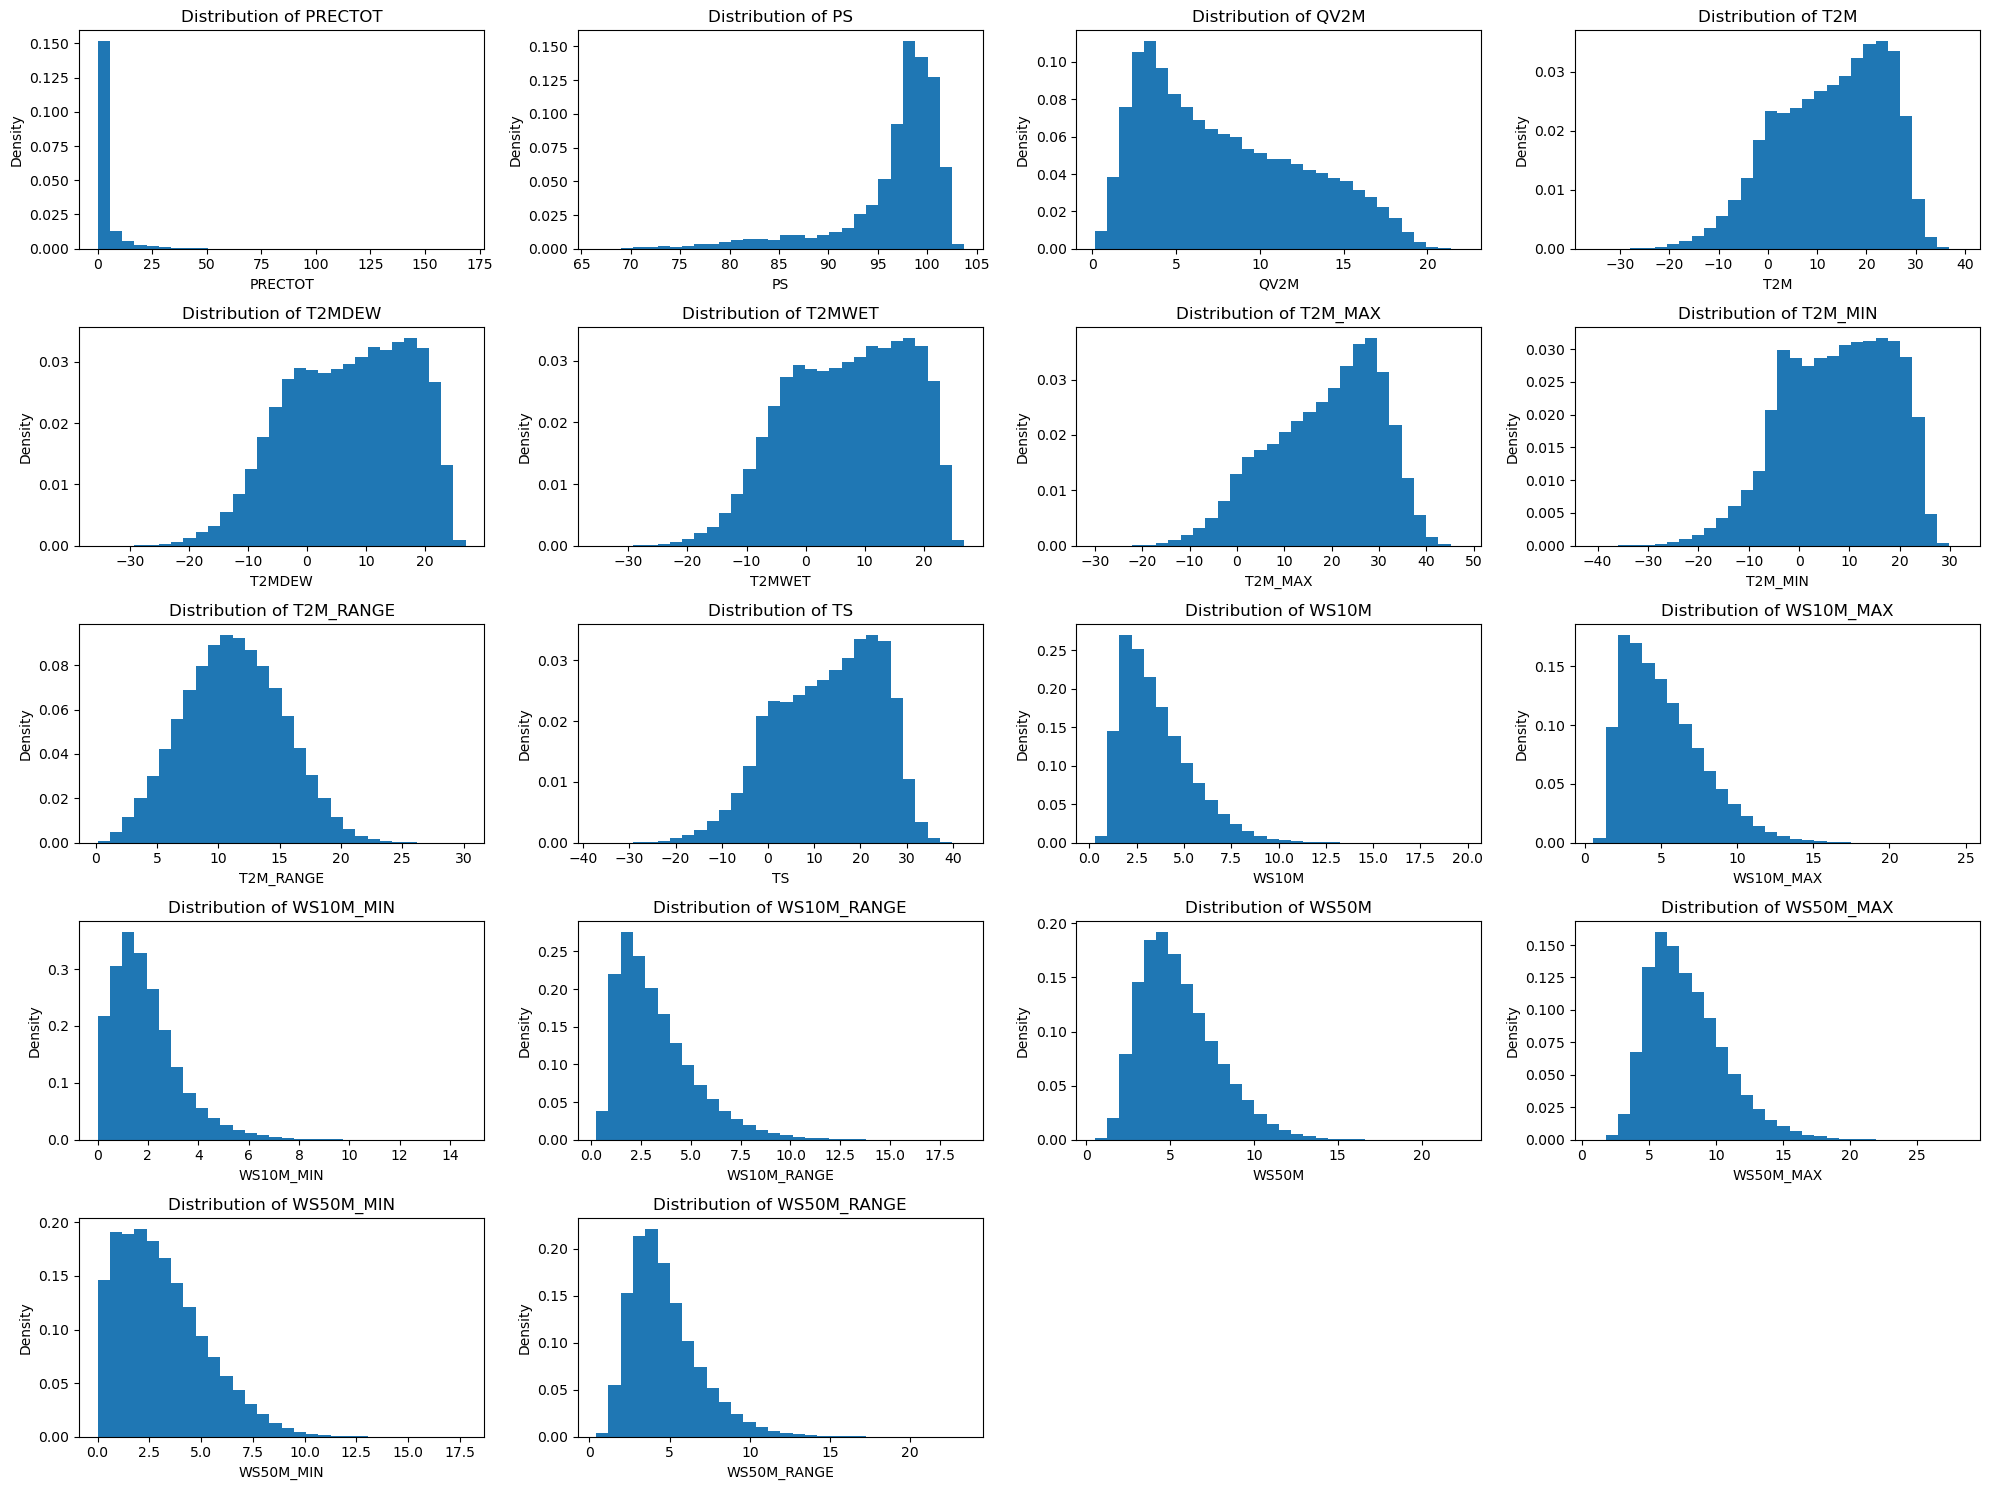

In [12]:
# Calculate number of rows and columns needed
n_measures = len(measures)
n_cols = 4  # Number of columns
n_rows = (n_measures + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten to easily iterate over

# Plot histograms 
for ax, col_name in zip(axes, measures):
    ax.hist(drought_df_measures[col_name], bins=30, density=True)  
    ax.set_xlabel(col_name)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {col_name}')

# Remove any empty subplots
for i in range(len(measures), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Identifying outliers

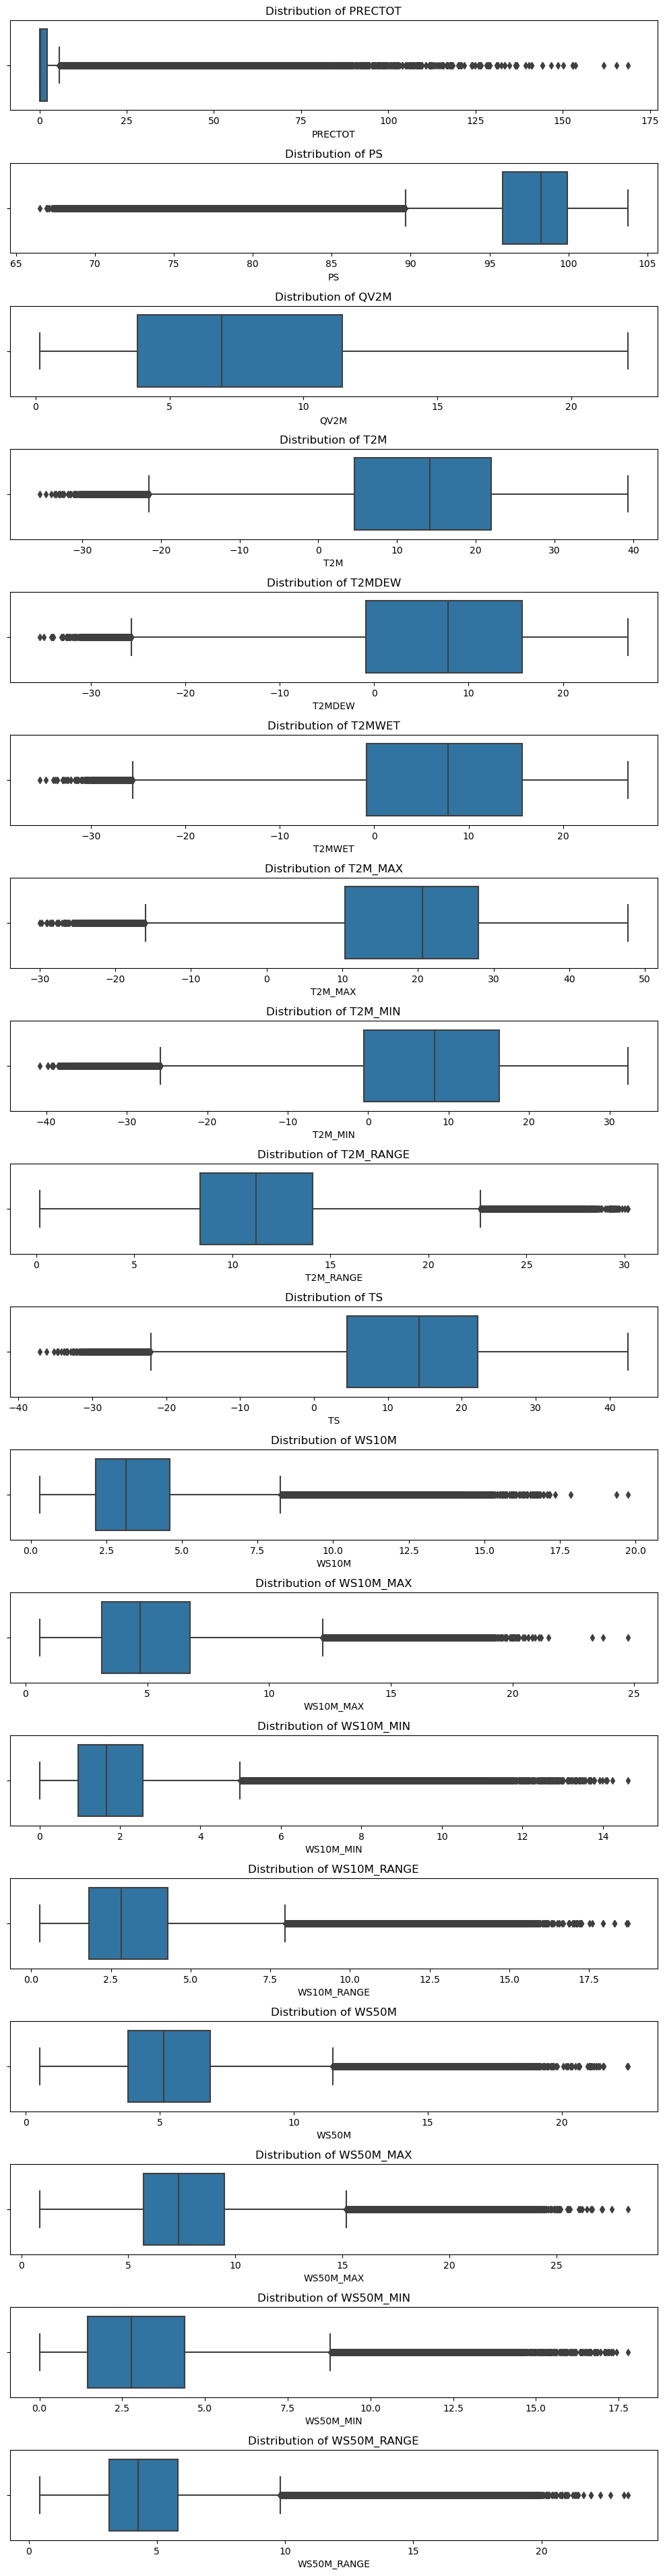

In [13]:
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x =  drought_df_measures.columns[x-1], data=drought_df_measures)
    x_name = drought_df_measures.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

In [14]:
# Three Standard Deviations Rule (3-sigma Rule)
# Any data point greater than 𝜇+3𝜎 or less than μ−3σ is considered an outlier

print('Total rows = ', len(drought_df_measures.index))
print("{:<70} {:>10}".format('\nColumn Name', 'Outliers'))  # Print header

for i in drought_df_measures.select_dtypes(exclude=['object']).columns:
    num = len(drought_df_measures[
        (drought_df_measures[i] > drought_df_measures[i].mean() + 3 * drought_df_measures[i].std()) | 
        (drought_df_measures[i] < drought_df_measures[i].mean() - 3 * drought_df_measures[i].std())
    ])
    print("{:<70} {:>10}".format(f'Number of values beyond the standard outlier limit in {i} is:', num))


Total rows =  2756796

Column Name                                                             Outliers
Number of values beyond the standard outlier limit in PRECTOT is:           65933
Number of values beyond the standard outlier limit in PS is:                73197
Number of values beyond the standard outlier limit in QV2M is:                  1
Number of values beyond the standard outlier limit in T2M is:                4531
Number of values beyond the standard outlier limit in T2MDEW is:             2023
Number of values beyond the standard outlier limit in T2MWET is:             1814
Number of values beyond the standard outlier limit in T2M_MAX is:            3384
Number of values beyond the standard outlier limit in T2M_MIN is:            6944
Number of values beyond the standard outlier limit in T2M_RANGE is:          3628
Number of values beyond the standard outlier limit in TS is:                 4762
Number of values beyond the standard outlier limit in WS10M is:             

In [15]:
# Function to filter outliers based on the 3-sigma rule
def remove_outliers(df, columns):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        upper_limit = mean + 3 * std
        lower_limit = mean - 3 * std
        df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
    return df

# Remove outliers
cleaned_drought_df_measures = remove_outliers(drought_df_measures, measures)

# Print the number of rows before and after removing outliers
print(f'Total rows before removing outliers: {len(drought_df_measures)}')
print(f'Total rows after removing outliers: {len(cleaned_drought_df_measures)}')
print(f'Number of outliers: {len(drought_df_measures)-len(cleaned_drought_df_measures)}')


Total rows before removing outliers: 2756796
Total rows after removing outliers: 2474338
Number of outliers: 282458
